 [Deep Leison dataset link](https://nihcc.app.box.com/v/DeepLesion/folder/50715173939)

The nhi deep leison dataset has the following files:


key_slices - example slices of images along with label

DL_info.csv - a file with the labels of all the images


images : They named each slice with the format “{patientindex}_{study index}_{series index}_{slice index}.png”, with the last underscore being / or \ to indicate sub-folders. The images are stored in unsigned 16 bit. One should subtract 32768 from the pixel intensity to obtain the original Hounsfield unit (HU) values. We provide not only the key CT slice that contains the lesion annotation, but also its 3D context (30mm extra slices above and below the key slice).





In [116]:
import os
from PIL import Image
import pandas as pd
import cv2
import imageio
import os
import zipfile
import matplotlib.pyplot as plt



I ran the "DL_save_nifti.py" file to get the nii files from the images which are stored in unsigned 16 bit format, then I sliced the nii file as shown below.

In [117]:
vol = imageio.volread('000001_01_01_103-115.nii')

In [118]:
vol.shape

(13, 512, 512)

Doubt : The dataset gives 16 bit files and the code to get the nii file out of it, it has labels for each sliced image file. The file '000001_01_01_103-115.nii' is made of thirteen 16 bit files( also has depth of 13 and we can get 13 slices of image out of it). So technically each slice should be of the same order and we should  assign the labels to each slice respectively, but I am not really sure about it 



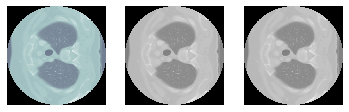

In [119]:
fig,axes = plt.subplots(nrows=1,ncols=3)
axes[0].imshow(vol[0],cmap = "bone")
axes[1].imshow(vol[0],cmap = "gray")
axes[2].imshow(vol[0],cmap = "gray")
#axes[3].imshow(vol[3],cmap = "gray")
for ax in axes:
    ax.axis("off")
plt.show()

In [120]:
for ii in range(1,10):
    if ii == 9: # To take the 9th slice and compare it with the '000001_01_01_109.png' example file present in the key slices
    
        im = vol[ii,:,:]
        imageio.imwrite("sliced_image_000001_01_01_109.jpg",im)

        print("image shape",im.shape)
       




Lossy conversion from int16 to uint8. Range [-3024, 830]. Convert image to uint8 prior to saving to suppress this warning.


image shape (512, 512)


I saved the sliced image as "sliced_image_000001_01_01_109.jpg" which corresponds to the slice image example shown  [below](#original_image) which was taken from the file key_slices present in the dataset

In [121]:
k = 'sliced_image_000001_01_01_109.jpg'

In [122]:
im = Image.open(k)
imt = cv2.imread(k)
imt.shape

(512, 512, 3)

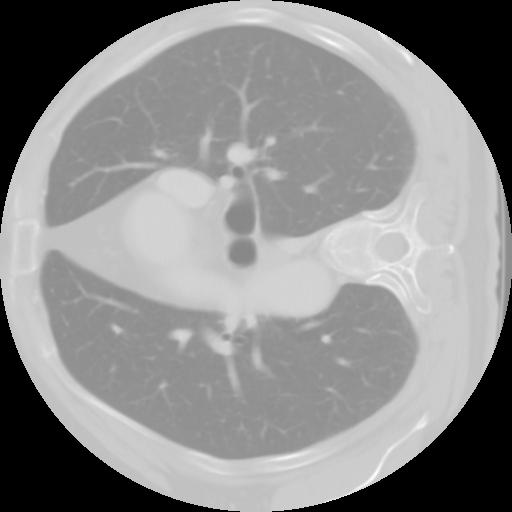

In [123]:
im

In [124]:
im.info

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}

I tried to change the resolution of image and save it as "test_600.png"

In [125]:
im.save("test-600.jpg", dpi=(10,10))
#im.show()

In [126]:
im = Image.open('test-600.jpg')
im.info

{'jfif': 257,
 'jfif_version': (1, 1),
 'dpi': (10, 10),
 'jfif_unit': 1,
 'jfif_density': (10, 10)}

### I am even able to increase the dpi, is it the correct way to change the resolution of image?

In [127]:
im.size

(512, 512)

I tried to get the bounding box co-ordinates of the image '000001_01_01_109.png'

In [128]:
df = pd.read_csv("DL_info (1).csv")
df.head()

File_name  Patient_index  Study_index  Series_ID  \
0  000001_01_01_109.png              1            1          1   
1  000001_02_01_014.png              1            2          1   
2  000001_02_01_017.png              1            2          1   
3  000001_03_01_088.png              1            3          1   
4  000001_04_01_017.png              1            4          1   

   Key_slice_index                            Measurement_coordinates  \
0              109  233.537, 95.0204, 234.057, 106.977, 231.169, 1...   
1               14  224.826, 289.296, 224.016, 305.294, 222.396, 2...   
2               17  272.323, 320.763, 246.522, 263.371, 234.412, 3...   
3               88  257.759, 157.618, 260.018, 133.524, 251.735, 1...   
4               17  304.019, 230.585, 292.217, 211.789, 304.456, 2...   

                       Bounding_boxes Lesion_diameters_Pixel_  \
0  226.169, 90.0204, 241.252, 111.977        11.9677, 5.10387   
1  217.396, 284.296, 233.978, 310.294         16.019, 6.61971   
2  229.412, 258.371, 285.221, 325.763        62.9245, 48.9929   
3  246.735, 128.524, 270.288, 162.618        24.1998, 13.6123   
4  287.217, 206.789, 309.456, 235.585         22.1937, 9.8065   

     Normalized_lesion_location  Coarse_lesion_type  Possibly_noisy  \
0   0.44666, 0.283794, 0.434454                   3               0   
1  0.431015, 0.485238, 0.340745                   3               0   
2  0.492691, 0.503106, 0.351754                   3               0   
3  0.498999, 0.278924, 0.452792                   3               0   
4   0.572678, 0.42336, 0.445674                   3               0   

  Slice_range         Spacing_mm_px_ Image_size DICOM_windows Patient_gender  \
0    103, 115  0.488281, 0.488281, 5   512, 512     -175, 275              F   
1       8, 23  0.314453, 0.314453, 5   512, 512     -175, 275              F   
2       8, 23  0.314453, 0.314453, 5   512, 512     -175, 275              F   
3     58, 118  0.732422, 0.732422, 1   512, 512     -175, 275              F   
4      11, 23  0.666016, 0.666016, 5   512, 512     -175, 275              F   

   Patient_age  Train_Val_Test  
0         62.0               3  
1         72.0               3  
2         72.0               3  
3         73.0               3  
4         73.0               3

In [129]:
ks = list(df["File_name"])


In [130]:
for i,j in enumerate(ks) :
    if j == k:
        print(i)

In [131]:
bounding_box = list(df["Bounding_boxes"])
m = bounding_box[0] 

In [132]:
j = m.split(",")

In [133]:
hs = []
for i in j:
    hs.append(float(i))

In [134]:
hs #bounding box co-ordinates

[226.169, 90.0204, 241.252, 111.977]

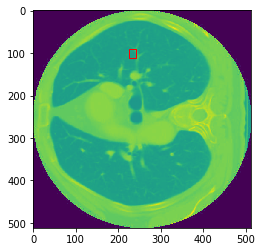

[226.169, 90.0204, 241.252, 111.977]

In [135]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('sliced_image_000001_01_01_109.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((hs[0] , hs[1] ), hs[2]-hs[0] , hs[3] - hs[1] ,linewidth=1,edgecolor='r',facecolor='none')
#0.3087787109375, 0.34495019531250004, -0.26591523437500003, -0.252490234375
# Add the patch to the Axes
ax.add_patch(rect)
plt.savefig("toot.png")
plt.show()
[226.169, 90.0204, 241.252, 111.977]

In [136]:
im.shape

(512, 512)

The above plot is obtained from the sliced image 

<a id="original_image"></a>

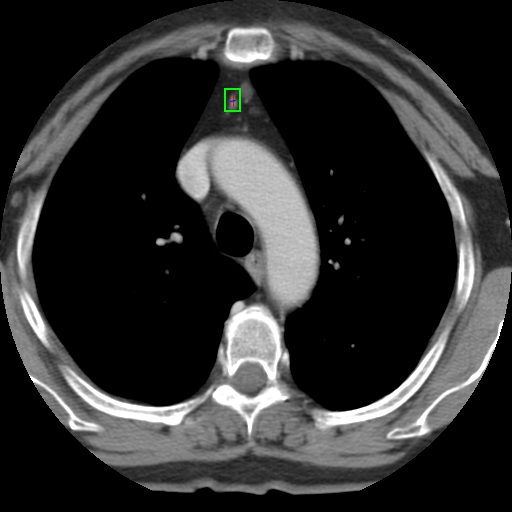

In [137]:
#im = Image.open(k)

imt = Image.open('000001_01_01_109.png')
#imt.shape
imt

The above image is taken from the file key_slice, which has example images.

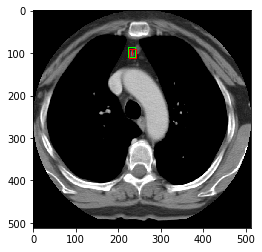

In [138]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('000001_01_01_109.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((hs[0] , hs[1] ), hs[2]-hs[0] , hs[3] - hs[1] ,linewidth=1,edgecolor='r',facecolor='none')
#0.3087787109375, 0.34495019531250004, -0.26591523437500003, -0.252490234375
# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
#[226.169, 90.0204, 241.252, 111.977]

The above plot has green bounding box which is already in the image, and red bounding box based on the label provided